# Reproducing the results of publications 

Chosen article: **What makes a straw man acceptable? Three experiments assessing linguistic factors**  
Autors: Jennifer Schumann, Sandrine Zufferey, Steve Oswald

The considered publication sums up the results of three consecutive experiments. We have received the data that was collected in the second experiment: *BaseDonnees_Exp.2_PresenceAbsenceConnecteur.xlsx*. We opened it with Excel and saved it as comma separated file. That's what we are going to import into our notebook as a tibble.

## 1. Import the data

In [197]:
library(readr)
library(tibble)

Which packages do we need for the following line to execute?

In [208]:
DB <- read_delim("BaseDonnees_Exp.2_PresenceAbsenceConnecteur.csv",",", col_names = TRUE)

Parsed with column specification:
cols(
  `Participant ID` = col_double(),
  List = col_double(),
  TagQualtrics = col_character(),
  Valeur = col_character(),
  Item = col_double(),
  Condition = col_character(),
  `Presence Connecteur` = col_character(),
  `Type Connecteur` = col_character(),
  `Type Question` = col_character()
)



Now let's check whether the created dataframe is a tibble.

In [199]:
is_tibble(DB)

[1] TRUE

Let's check how does it the data that we imported look like.

In [200]:
#print(DB) 
head(DB)

Participant ID,List,TagQualtrics,Valeur,Item,Condition,Presence Connecteur,Type Connecteur,Type Question
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,1,Q1_Sexe,1,NA,NA,NA,NA,Q1.1_Sexe
1,1,Q1_Sexe_3_TEXT,NA,NA,NA,NA,NA,Q1.2_Sexe_3_TEXT
1,1,Q2_Age,22,NA,NA,NA,NA,Q2_Age
1,1,Q3_Langue,2,NA,NA,NA,NA,Q3.1_Langue
1,1,Q3_Langue_3_TEXT,NA,NA,NA,NA,NA,Q3.2_Langue
1,1,Q5_Lieu,Royaume uni,NA,NA,NA,NA,Q5_Lieu


# 2. Reproduce the descriptive statistics 

In the article the descriptive statistics of the collected data is in the below table summarised.

![Whatever](Experiment2DescriptStat.png)

Without any other specification we can create some statistics:

In [5]:
sapply(DB, mean) # only mean value
#summary(DB)

Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”


Participant ID                List        TagQualtrics              Valeur 
          36.945715            2.588995                  NA                  NA 
               Item           Condition Presence Connecteur     Type Connecteur 
                 NA                  NA                  NA                  NA 
      Type Question 
                 NA

Let's erase the lines with personal information, as the presented study doesn't use these in any sense later on. These might be the cause preventing to get any reasonable statistics.

## Data preparation (tidying)

Handy cheatsheet: https://rstudio.com/wp-content/uploads/2015/02/data-wrangling-cheatsheet.pdf.

In [6]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [7]:
library(tidyr)

In [209]:
DB_WithoutID <- drop_na(DB)

In [210]:
head(DB_WithoutID, n=10)

Participant ID,List,TagQualtrics,Valeur,Item,Condition,Presence Connecteur,Type Connecteur,Type Question
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,1,L1_1_AFC_1,5,1,Fallacieux,oui,Comme,Proportion
1,1,L1_1_AFC_2,5,1,Fallacieux,oui,Comme,Decoulement
1,1,L1_1_AFC_3,5,1,Fallacieux,oui,Comme,AccordA
1,1,L1_1_AFC_4,4,1,Fallacieux,oui,Comme,AccordB
1,1,L1_2_AFS_1,2,2,Fallacieux,non,Comme,Proportion
1,1,L1_2_AFS_2,4,2,Fallacieux,non,Comme,Decoulement
1,1,L1_2_AFS_3,2,2,Fallacieux,non,Comme,AccordA
1,1,L1_2_AFS_4,6,2,Fallacieux,non,Comme,AccordB
1,1,L1_3_ANC_1,5,3,NonFallacieux,oui,Comme,Proportion


Now our data table looks good. It contains the necessary information for calculating mean and standard deviation of the "Valeur". The only issue is that the typr of this column is still not numeric. 

In [211]:
DB_WithoutID$Valeur <- as.numeric(as.character(DB_WithoutID$Valeur))

In [212]:
DB_cleaned <- DB_WithoutID %>%
  select("Participant ID","Valeur","Item", "Condition", "Presence Connecteur", "Type Question")

In [213]:
head(DB_cleaned)

Participant ID,Valeur,Item,Condition,Presence Connecteur,Type Question
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,5,1,Fallacieux,oui,Proportion
1,5,1,Fallacieux,oui,Decoulement
1,5,1,Fallacieux,oui,AccordA
1,4,1,Fallacieux,oui,AccordB
1,2,2,Fallacieux,non,Proportion
1,4,2,Fallacieux,non,Decoulement


In [214]:
#sapply(DB_cleaned, mean) # only mean value
#summary(DB_cleaned)
summary(DB_cleaned$Valeur)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   4.000   4.207   5.000   7.000 

In [215]:
sapply(DB_WithoutID, mean)

Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”


Participant ID                List        TagQualtrics              Valeur 
          37.000000            2.589041                  NA            4.207106 
               Item           Condition Presence Connecteur     Type Connecteur 
          20.500000                  NA                  NA                  NA 
      Type Question 
                 NA

In [216]:
library(psych)

In [217]:
?describeBy

describeBy {psych},R Documentation
x,a data.frame or matrix. See note for statsBy.
group,a grouping variable or a list of grouping variables
mat,provide a matrix output rather than a list
type,Which type of skew and kurtosis should be found
digits,"When giving matrix output, how many digits should be reported?"
...,parameters to be passed to describe


Try the following statistics out. Keep the one which is the easiest to compare with the descriptive statistics from the article.

In [219]:
describeBy(DB_cleaned,list(DB_cleaned$"Type Question", DB_cleaned$"Condition",DB_cleaned$"Presence Connecteur"))
#describeBy(DB_cleaned$Valeur,list(DB_cleaned$"Type Question", DB_cleaned$"Condition",DB_cleaned$"Presence Connecteur"))
#describeBy(DB_cleaned$Valeur,list(DB_cleaned$"Type Question", DB_cleaned$"Condition",DB_cleaned$"Presence Connecteur"),mat=TRUE)
#describeBy(DB_cleaned$Valeur,list(DB_cleaned$"Presence Connecteur", DB_cleaned$"Condition", DB_cleaned$"Type Question"),mat=TRUE)

,item,group1,group2,group3,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,non,Fallacieux,AccordA,1,730,3.641096,1.730849,4,3.614726,1.4826,1,7,6,0.14721491,-0.99292114,0.06406161
X12,2,oui,Fallacieux,AccordA,1,730,3.616438,1.739007,4,3.575342,1.4826,1,7,6,0.17191534,-0.92834493,0.06436355
X13,3,non,NonFallacieux,AccordA,1,730,4.454795,1.507643,5,4.592466,1.4826,1,7,6,-0.62818296,-0.37211166,0.05580038
X14,4,oui,NonFallacieux,AccordA,1,730,4.456164,1.582265,5,4.582192,1.4826,1,7,6,-0.56918002,-0.42848978,0.05856226
X15,5,non,Fallacieux,AccordB,1,730,4.664384,1.455689,5,4.835616,1.4826,1,7,6,-0.82070011,0.12661875,0.05387748
X16,6,oui,Fallacieux,AccordB,1,730,4.679452,1.451073,5,4.856164,1.4826,1,7,6,-0.84998495,0.18523950,0.05370662
X17,7,non,NonFallacieux,AccordB,1,730,4.723288,1.444019,5,4.914384,1.4826,1,7,6,-0.93019697,0.32012188,0.05344554
X18,8,oui,NonFallacieux,AccordB,1,730,4.808219,1.391307,5,4.984589,1.4826,1,7,6,-1.01064021,0.67094585,0.05149458
X19,9,non,Fallacieux,Decoulement,1,730,3.995890,1.319365,4,4.027397,1.4826,1,7,6,-0.27875915,-0.28154445,0.04883189


Do our results match the ones from the article?

Let's double check. Find another way to provide the desired descriptive statistics.
* First we will have to group the answers with respect to the "Type Question" and with respect to the "Condition" and "Presence Connecteur". 
* Then we calculate the mean and standard deviation.

In [222]:
DB_cleaned %>%
  group_by(Condition) %>%
  summarize(mean_valeur = mean(Valeur,na.rm=TRUE),
            sd_valeur = sd(Valeur,na.rm=TRUE))

DB_cleaned %>%
  group_by("Type Question", Condition) %>%
  summarize(mean_valeur = mean(Valeur,na.rm=TRUE),
            sd_valeur = sd(Valeur,na.rm=TRUE))

DB_cleaned %>%
  group_by("Type Question", Condition, "Presence Connecteur") %>%
  summarize(mean_valeur = mean(Valeur,na.rm=TRUE),
            sd_valeur = sd(Valeur,na.rm=TRUE))

Condition,mean_valeur,sd_valeur
<chr>,<dbl>,<dbl>
Fallacieux,3.938356,1.579530
NonFallacieux,4.475856,1.415823


"""Type Question""",Condition,mean_valeur,sd_valeur
<chr>,<chr>,<dbl>,<dbl>
Type Question,Fallacieux,3.938356,1.579530
Type Question,NonFallacieux,4.475856,1.415823


"""Type Question""",Condition,"""Presence Connecteur""",mean_valeur,sd_valeur
<chr>,<chr>,<chr>,<dbl>,<dbl>
Type Question,Fallacieux,Presence Connecteur,3.938356,1.579530
Type Question,NonFallacieux,Presence Connecteur,4.475856,1.415823


In [230]:
DB_cleaned %>%
  group_by_at(c("Type Question","Condition","Presence Connecteur")) %>%
  summarize(mean_valeur = mean(Valeur,na.rm=TRUE),
            sd_valeur = sd(Valeur,na.rm=TRUE))

Type Question,Condition,Presence Connecteur,mean_valeur,sd_valeur
<chr>,<chr>,<chr>,<dbl>,<dbl>
AccordA,Fallacieux,non,3.641096,1.730849
AccordA,Fallacieux,oui,3.616438,1.739007
AccordA,NonFallacieux,non,4.454795,1.507643
AccordA,NonFallacieux,oui,4.456164,1.582265
AccordB,Fallacieux,non,4.664384,1.455689
AccordB,Fallacieux,oui,4.679452,1.451073
AccordB,NonFallacieux,non,4.723288,1.444019
AccordB,NonFallacieux,oui,4.808219,1.391307
Decoulement,Fallacieux,non,3.995890,1.319365


In [233]:
DB_cleaned2 <- DB_cleaned[DB_cleaned$Valeur<7,]

In [234]:
head(DB_cleaned2)

Participant ID,Valeur,Item,Condition,Presence Connecteur,Type Question
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,5,1,Fallacieux,oui,Proportion
1,5,1,Fallacieux,oui,Decoulement
1,5,1,Fallacieux,oui,AccordA
1,4,1,Fallacieux,oui,AccordB
1,2,2,Fallacieux,non,Proportion
1,4,2,Fallacieux,non,Decoulement


In [236]:
summary(DB_cleaned2$Valeur)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   4.000   4.123   5.000   6.000 

In [237]:
DB_cleaned2 %>%
  group_by_at(c("Type Question","Condition","Presence Connecteur")) %>%
  summarize(mean_valeur = mean(Valeur,na.rm=TRUE),
            sd_valeur = sd(Valeur,na.rm=TRUE))

Type Question,Condition,Presence Connecteur,mean_valeur,sd_valeur
<chr>,<chr>,<chr>,<dbl>,<dbl>
AccordA,Fallacieux,non,3.466859,1.592161
AccordA,Fallacieux,oui,3.415094,1.575283
AccordA,NonFallacieux,non,4.371994,1.459154
AccordA,NonFallacieux,oui,4.304790,1.498058
AccordB,Fallacieux,non,4.560801,1.400044
AccordB,Fallacieux,oui,4.580000,1.398200
AccordB,NonFallacieux,non,4.632479,1.397562
AccordB,NonFallacieux,oui,4.711016,1.341227
Decoulement,Fallacieux,non,3.954167,1.279716


For more details about the above solution consult https://datacarpentry.org/R-genomics/04-dplyr.html.

# 3. Reproduce the two-way ANOVA analysis

We will reproduce the two-way ANOVA per categories of questions. We start with the question type "Proportion".

In [241]:
DB_Proportion <- DB_cleaned %>%
  filter(get("Type Question")=="Proportion") %>%
  select(Condition, "Presence Connecteur", Valeur)

In [242]:
head(DB_Proportion, n=10)

Condition,Presence Connecteur,Valeur
<chr>,<chr>,<dbl>
Fallacieux,oui,5
Fallacieux,non,2
NonFallacieux,oui,5
NonFallacieux,non,6
Fallacieux,oui,4
Fallacieux,non,3
NonFallacieux,oui,5
NonFallacieux,non,6
Fallacieux,oui,3


In [243]:
boxplot(Valeur ~ Condition:Presence Connecteur,
        data = DB_Proportion,
        xlab = "Condition x Presence Connecteur",
        ylab = "Valeur")

ERROR: Error in parse(text = x, srcfile = src): <text>:1:37: unexpected symbol
1: boxplot(Valeur ~ Condition:Presence Connecteur
                                        ^


In [244]:
library("ggpubr")

In [245]:
ggboxplot(DB_Proportion, x = "Condition", y = "Valeur", color = "Presence Connecteur",
          palette = c("#00AFBB", "#E7B800"))

ERROR: Error in parse(text = x): <text>:1:10: unexpected symbol
1: Presence Connecteur
             ^


The above two errors are due to the fact, that we have space in the names of columns. Let's change that.


In [246]:
DB_cleaned <- DB_cleaned %>% rename("PresenceConnecteur" = "Presence Connecteur")

In [247]:
DB_cleaned <- DB_cleaned %>% rename("TypeQuestion" = "Type Question")

In [248]:
DB_cleaned <- DB_cleaned %>% rename("ParticipantID" = "Participant ID")

In [249]:
write_csv(DB_cleaned,"DB_cleaned.csv")

In [250]:
head(DB_cleaned)

ParticipantID,Valeur,Item,Condition,PresenceConnecteur,TypeQuestion
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,5,1,Fallacieux,oui,Proportion
1,5,1,Fallacieux,oui,Decoulement
1,5,1,Fallacieux,oui,AccordA
1,4,1,Fallacieux,oui,AccordB
1,2,2,Fallacieux,non,Proportion
1,4,2,Fallacieux,non,Decoulement


In [251]:
DB_Proportion <- DB_cleaned %>%
  filter(TypeQuestion=="Proportion") %>%
  select(Condition, PresenceConnecteur, Valeur)

In [252]:
head(DB_Proportion)

Condition,PresenceConnecteur,Valeur
<chr>,<chr>,<dbl>
Fallacieux,oui,5
Fallacieux,non,2
NonFallacieux,oui,5
NonFallacieux,non,6
Fallacieux,oui,4
Fallacieux,non,3


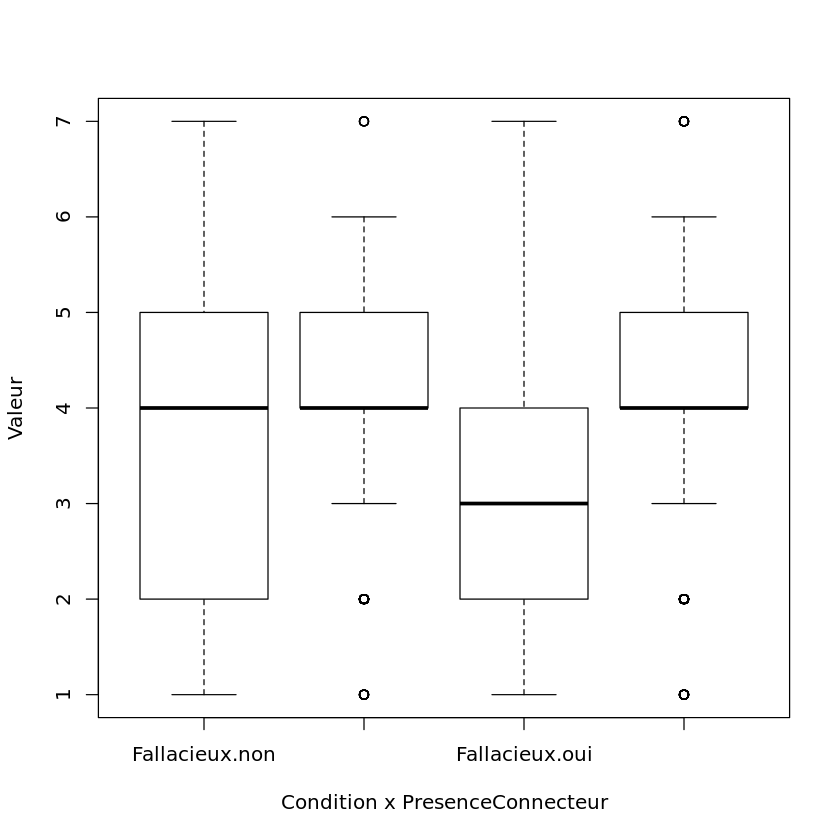

In [253]:
boxplot(Valeur ~ Condition:PresenceConnecteur,
        data = DB_Proportion,
        xlab = "Condition x PresenceConnecteur",
        ylab = "Valeur")

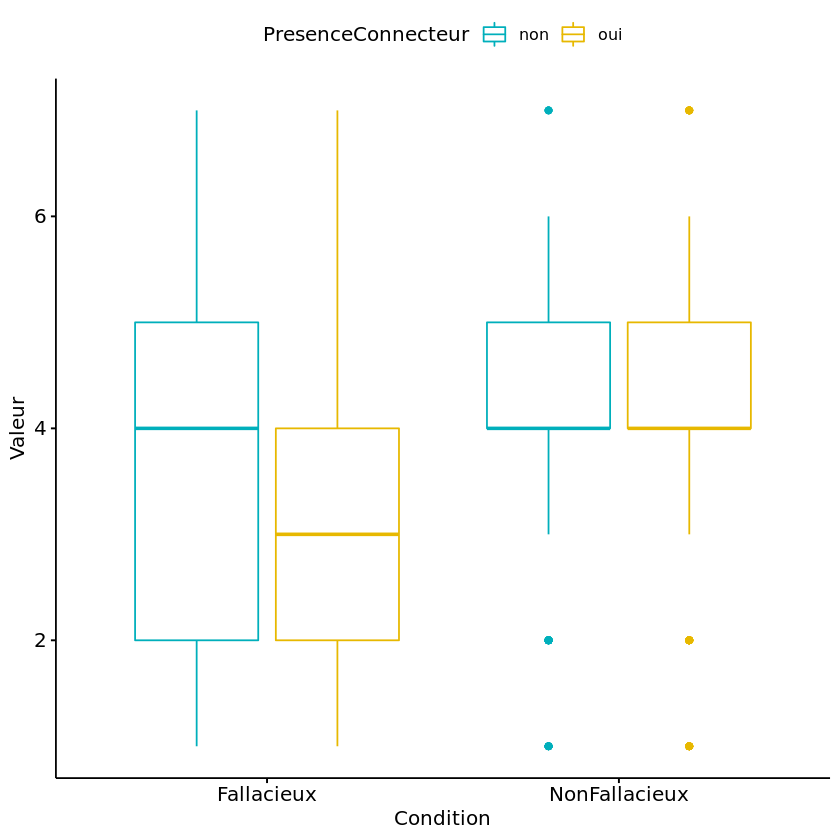

In [254]:
ggboxplot(DB_Proportion, x = "Condition", y = "Valeur", color = "PresenceConnecteur",
          palette = c("#00AFBB", "#E7B800"))

### Two-way anova without interaction effect

In [35]:
res.aov1 <- aov(Valeur ~  Condition + PresenceConnecteur, data = DB_Proportion)
summary(res.aov1)

                     Df Sum Sq Mean Sq F value Pr(>F)    
Condition             1    466   465.6  237.91 <2e-16 ***
PresenceConnecteur    1      5     4.9    2.52  0.113    
Residuals          2917   5709     2.0                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [36]:
print(model.tables(res.aov1,"means"),digits=3) 

Tables of means
Grand mean
         
3.923973 

 Condition 
Condition
   Fallacieux NonFallacieux 
         3.52          4.32 

 PresenceConnecteur 
PresenceConnecteur
 non  oui 
3.97 3.88 


### Two-way anova with interaction effect

In [37]:
res.aov2 <- aov(Valeur ~ Condition*PresenceConnecteur, data = DB_Proportion)
summary(res.aov2)

                               Df Sum Sq Mean Sq F value Pr(>F)    
Condition                       1    466   465.6 237.856 <2e-16 ***
PresenceConnecteur              1      5     4.9   2.519  0.113    
Condition:PresenceConnecteur    1      1     0.5   0.280  0.597    
Residuals                    2916   5708     2.0                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [38]:
print(model.tables(res.aov2,"means"),digits=3) 

Tables of means
Grand mean
         
3.923973 

 Condition 
Condition
   Fallacieux NonFallacieux 
         3.52          4.32 

 PresenceConnecteur 
PresenceConnecteur
 non  oui 
3.97 3.88 

 Condition:PresenceConnecteur 
               PresenceConnecteur
Condition       non  oui 
  Fallacieux    3.58 3.47
  NonFallacieux 4.35 4.30


### Test whether the assumptions of the ANOVA hold

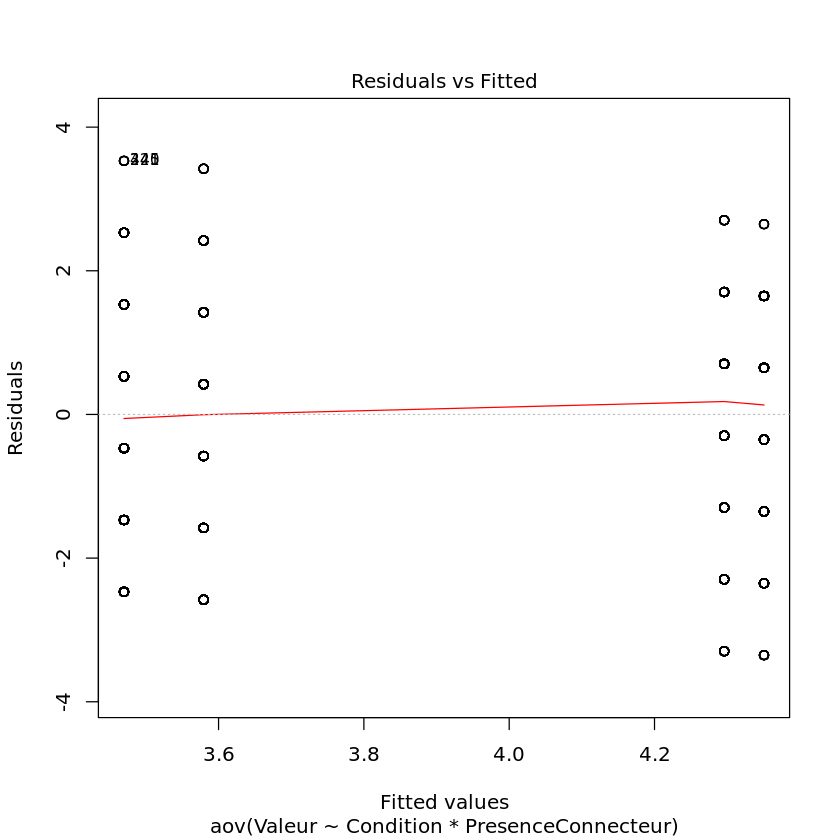

In [39]:
plot(res.aov2, 1)

In [40]:
library(car)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:psych’:

    logit


The following object is masked from ‘package:dplyr’:

    recode




In [42]:
leveneTest(Valeur ~ Condition*PresenceConnecteur, data = DB_Proportion)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,11.79286,1.120616e-07
,2916,NA,NA


The variance across the groups is significantly different.

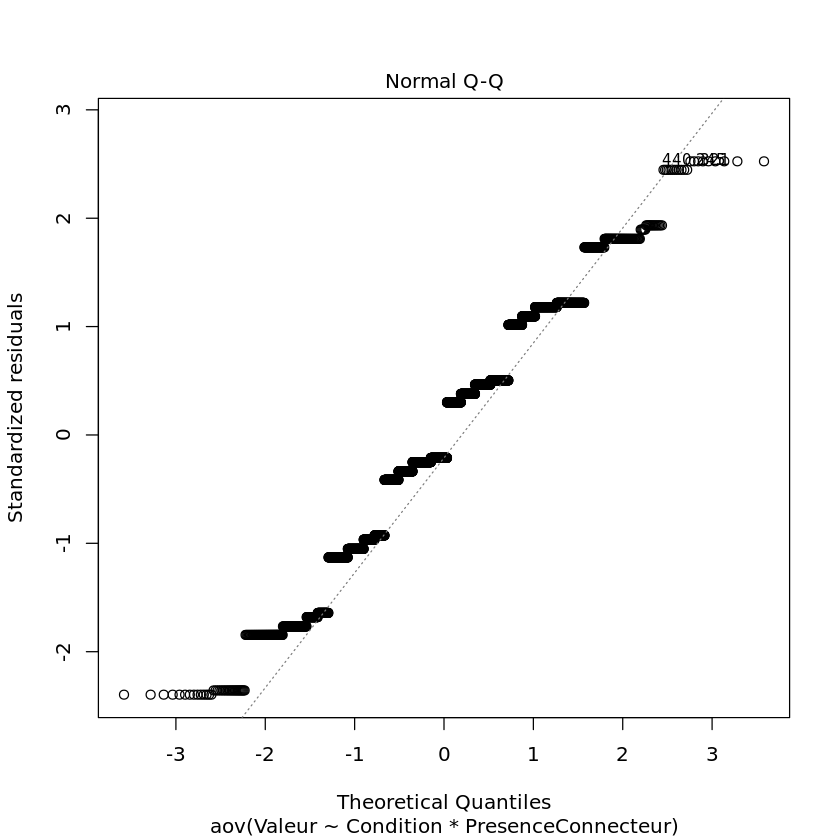

In [43]:
plot(res.aov2, 2)

In [255]:
# Extract the residuals
aov_residuals <- residuals(object = res.aov2)
# Run Shapiro-Wilk test
shapiro.test(x = aov_residuals)


	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.97444, p-value < 2.2e-16


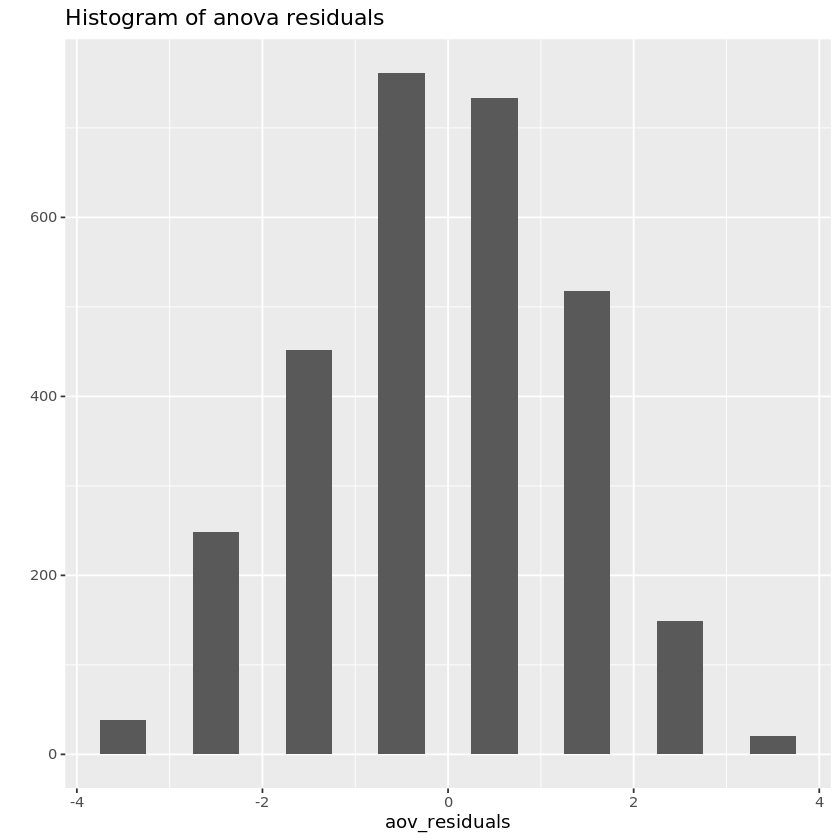

In [258]:
#hist(aov_residuals)
qplot(aov_residuals,
      geom="histogram",
      binwidth = 0.5,  
      main = "Histogram of anova residuals")

However visually the quantiles of the normal distribution and the quantiles of the residuals of the model are close to the refernce line (first bisector), which suggests normality, and with the bandwidth of 0.5 the histogram of the residuals seems to be normal, the residuals fail on the Shapiro-Wilkoxon normality test.

## Post hoc test for main effects and interactions

In [46]:
TukeyHSD(res.aov2)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Valeur ~ Condition * PresenceConnecteur, data = BD_Proportion)

$Condition
                              diff       lwr       upr p adj
NonFallacieux-Fallacieux 0.7986301 0.6970949 0.9001654     0

$PresenceConnecteur
               diff       lwr        upr     p adj
oui-non -0.08219178 -0.183727 0.01934345 0.1125688

$`Condition:PresenceConnecteur`
                                           diff        lwr         upr
NonFallacieux:non-Fallacieux:non     0.77123288  0.5829880  0.95947779
Fallacieux:oui-Fallacieux:non       -0.10958904 -0.2978340  0.07865587
NonFallacieux:oui-Fallacieux:non     0.71643836  0.5281934  0.90468327
Fallacieux:oui-NonFallacieux:non    -0.88082192 -1.0690668 -0.69257700
NonFallacieux:oui-NonFallacieux:non -0.05479452 -0.2430394  0.13345039
NonFallacieux:oui-Fallacieux:oui     0.82602740  0.6377825  1.01427231
                                        p adj
NonFallac

# 4. Second look at ANOVA - Is this what we wanted?

If you check the degree of freedom of the residuals, you realise that it is huge, while in the paper it is 32, respectively 39. What did we wrong? Before doing the analysis we should probably agrregate more our data.

## 5. Model example for repeated measure ANOVA

To read more about how to carry out such an analysis visit https://www.datanovia.com/en/lessons/repeated-measures-anova-in-r/.

In [ ]:
install.packages("rstatix")

In [ ]:
library(rstatix)

In [132]:
install.packages("datarium")
library(datarium)

Installing package into ‘/home/.local/R/3.6/lib’
(as ‘lib’ is unspecified)



## Load the data

In [156]:
set.seed(123)
data("weightloss", package = "datarium")
weightloss %>% sample_n_by(diet, exercises, size = 1)

id,diet,exercises,t1,t2,t3
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
3,no,no,11.35,11.12,11.35
3,no,yes,12.05,13.67,17.84
10,yes,no,11.12,15.29,10.89
2,yes,yes,11.35,14.83,15.06


In [158]:
# Gather the columns t1, t2 and t3 into long format.
# Convert id and time into factor variables
weightloss <- weightloss %>%
  gather(key = "time", value = "score", t1, t2, t3) %>%
  convert_as_factor(id, time)
# Inspect some random rows of the data by groups
set.seed(123)
weightloss %>% sample_n_by(diet, exercises, time, size = 1)

id,diet,exercises,time,score
<fct>,<fct>,<fct>,<fct>,<dbl>
3,no,no,t1,11.35
3,no,no,t2,11.12
10,no,no,t3,11.35
2,no,yes,t1,9.96
6,no,yes,t2,12.98
11,no,yes,t3,19.00
5,yes,no,t1,11.59
4,yes,no,t2,9.73
6,yes,no,t3,12.74


## Summary statistics

In [159]:
weightloss %>%
  group_by(diet, exercises, time) %>%
  get_summary_stats(score, type = "mean_sd")

diet,exercises,time,variable,n,mean,sd
<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>
no,no,t1,score,12,10.909,0.868
no,no,t2,score,12,11.566,1.298
no,no,t3,score,12,11.450,0.935
no,yes,t1,score,12,10.794,1.267
no,yes,t2,score,12,13.421,1.006
no,yes,t3,score,12,16.817,1.530
yes,no,t1,score,12,11.742,0.938
yes,no,t2,score,12,12.416,1.420
yes,no,t3,score,12,13.787,1.433


In [160]:
print(weightloss)

# A tibble: 144 x 5
   id    diet  exercises time  score
   <fct> <fct> <fct>     <fct> <dbl>
 1 1     no    no        t1     10.4
 2 2     no    no        t1     11.6
 3 3     no    no        t1     11.4
 4 4     no    no        t1     11.1
 5 5     no    no        t1      9.5
 6 6     no    no        t1      9.5
 7 7     no    no        t1     11.1
 8 8     no    no        t1     12.5
 9 9     no    no        t1     11.4
10 10    no    no        t1     11.1
# … with 134 more rows


# Visualisation

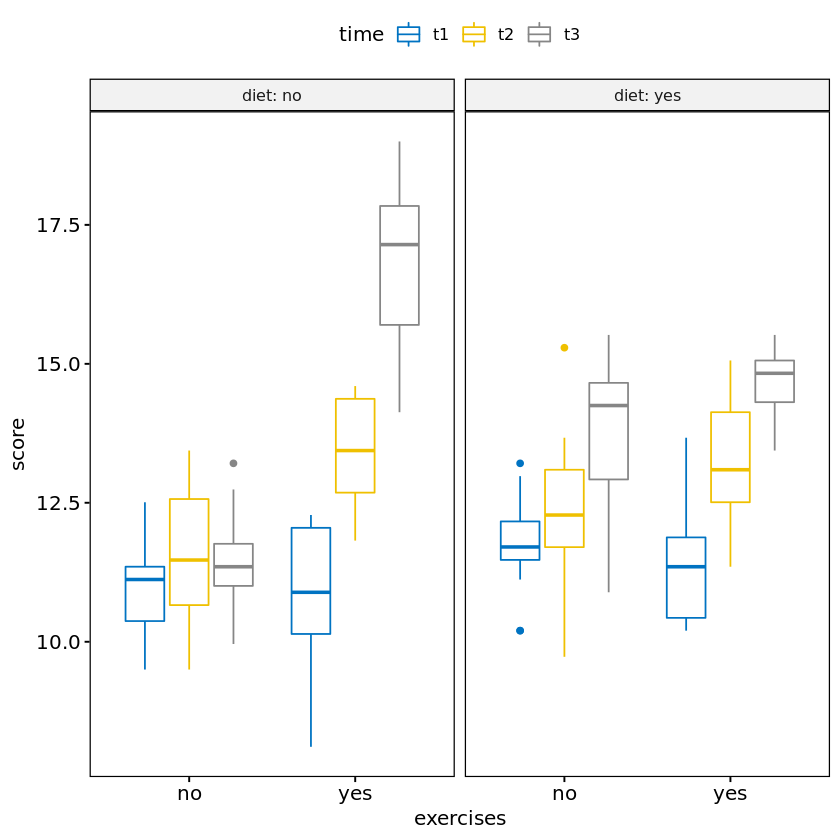

In [161]:
bxp <- ggboxplot(
  weightloss, x = "exercises", y = "score",
  color = "time", palette = "jco",
  facet.by = "diet", short.panel.labs = FALSE
  )
bxp

## Check assumptions

In [162]:
weightloss %>%
  group_by(diet, exercises, time) %>%
  identify_outliers(score)

diet,exercises,time,id,score,is.outlier,is.extreme
<fct>,<fct>,<fct>,<fct>,<dbl>,<lgl>,<lgl>
no,no,t3,2,13.21,TRUE,FALSE
yes,no,t1,1,10.20,TRUE,FALSE
yes,no,t1,3,13.21,TRUE,FALSE
yes,no,t1,4,10.20,TRUE,FALSE
yes,no,t2,10,15.29,TRUE,FALSE


In [163]:
weightloss %>%
  group_by(diet, exercises, time) %>%
  shapiro_test(score)

diet,exercises,time,variable,statistic,p
<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>
no,no,t1,score,0.9173082,0.2643971
no,no,t2,score,0.9571979,0.7432089
no,no,t3,score,0.9649090,0.8509028
no,yes,t1,score,0.9223457,0.3059440
no,yes,t2,score,0.9123400,0.2285804
no,yes,t3,score,0.9525447,0.6744326
yes,no,t1,score,0.9422786,0.5281443
yes,no,t2,score,0.9816773,0.9894564
yes,no,t3,score,0.9313724,0.3948864


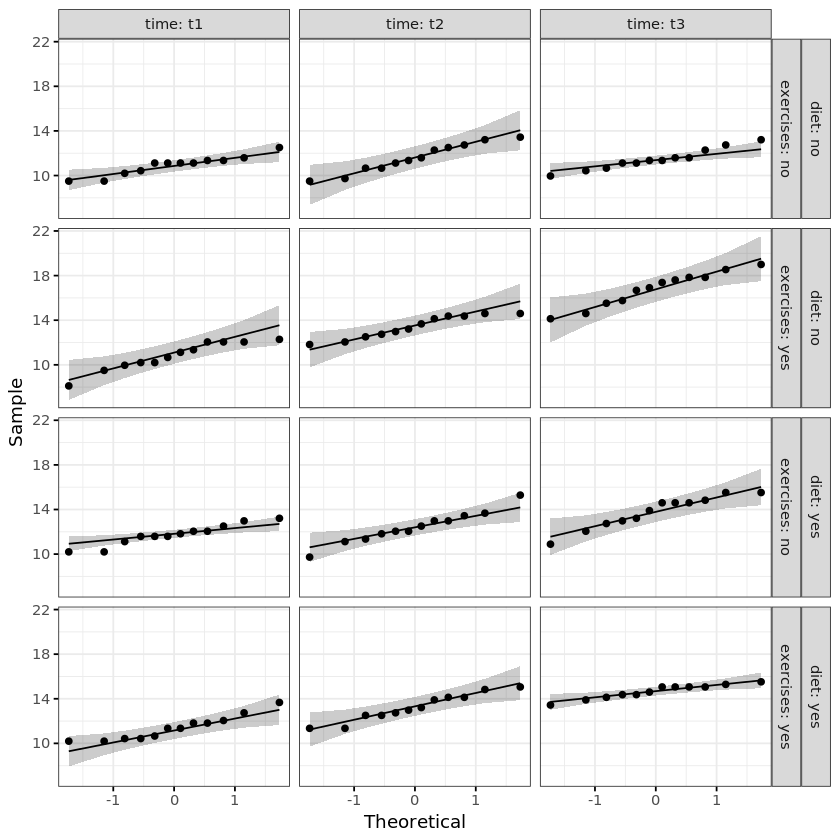

In [164]:
ggqqplot(weightloss, "score", ggtheme = theme_bw()) +
  facet_grid(diet + exercises ~ time, labeller = "label_both")

## Computation

In [165]:
res.aov <- anova_test(
  data = weightloss, dv = score, wid = id,
  within = c(diet, exercises, time)
  )
get_anova_table(res.aov)

Effect,DFn,DFd,F,p,p<.05,ges
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
diet,1.00,11.00,6.021,3.20e-02,*,0.028
exercises,1.00,11.00,58.928,9.65e-06,*,0.284
time,2.00,22.00,110.942,3.22e-12,*,0.541
diet:exercises,1.00,11.00,75.356,2.98e-06,*,0.157
diet:time,1.38,15.17,0.603,5.01e-01,,0.013
exercises:time,2.00,22.00,20.826,8.41e-06,*,0.274
diet:exercises:time,2.00,22.00,14.246,1.07e-04,*,0.147
